<a href="https://colab.research.google.com/github/JosegSuarezb/aprendizaje-no-supervisado/blob/main/Reto6_JoseGregorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Con los datos de IPhone Customer Reviews | NLP, con la columna de reviewDescription deben implementar LDA.

1. Realice una limpieza de texto a la columna reviewDescription que considere apropiada.
2. Implemente el algoritmo de LDA y determine el número de tópicos con este algoritmo.
3. Realice una visualización de los tópicos sobre los temas mas destacados.
4. Justifique cuál es el número de tópicos adecuado.
5. Asigne la etiqueta de clúster a la columna de los datos.
6. Realice un gráfico de palabras por cada tópico.
7. Realice un gráfico para determinar  ¿cuál tópico tiene un menor promedio de ratingscore? ¿Qué temáticas hay en este tópico?

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install unidecode
!pip install pyLDAvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=b32d176a3a186b7229ca43727af2b1797f8d8afce4918826f8264b36ad0fb7a2
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [ ]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/gdrive')
from googletrans import Translator # libreria para traducir
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from textblob import TextBlob  #
from unidecode import unidecode
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from gensim import corpora
from gensim.models import LdaModel,CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import gensim

Mounted at /content/gdrive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
stop_words_nltk_en =list(set(stopwords.words('english')))
stop_words_nltk_en =["u","ok", *stop_words_nltk_en]
stop_words_nltk_es =list(set(stopwords.words('spanish')))
stop_words_nltk_es2 =[]
stop_words_nltk_en2 =[]

#Quitar palabras en español
for i in stop_words_nltk_es:

  stop_words_nltk_es2.append(unidecode(i))
stop_words_nltk_es2 = [*stop_words_nltk_es2,"dia","ano","anos","si","sera","punto","asi","san","tra","s","u","v","pai","va"] #el * une los elementos de una lista.

#Quitar palabras en inglés
for i in stop_words_nltk_en:

   stop_words_nltk_en2.append(unidecode(i))
stop_words_nltk_en2 = [*stop_words_nltk_en2,"ok","u","iphone","phone","said","apple","always"]

def texto_limpio(texto, idioma ="en"):
  """
  Recibe un texto
  Retorna un texto sin simbolos, sin stopwords, en minusculas
  idioma = en (inglés) o es (español)
  """
  texto_limpio=str(texto).lower()
  # blob = TextBlob(texto_limpio )
  # texto_limpio= blob.correct().string
  texto_limpio= re.sub(r'https?://\S+|www\.\S+', ' ', texto_limpio)  # eliminar la URL
  if idioma=="es":
    texto_limpio = unidecode(texto_limpio) # elimina los acentos y ñ
  texto_limpio= re.sub(r"[^A-Za-z]+",' ',texto_limpio) # Eliminar simbolos
  texto_limpio = texto_limpio.split() # seperacion de tokens
  if idioma=="en":
    texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_en2] # eliminacción de stop word
  elif idioma=="es":
    texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_es2] # eliminacción de stop word
  texto_limpio=' '.join(texto_limpio)
  return texto_limpio
  return texto_limpio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_iphone= pd.read_csv("/content/gdrive/MyDrive/aprendizaje no supervisado/iphone.csv")
datos_iphone.dropna()
datos_iphone.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [ ]:
datos_iphone["ratingScore"].value_counts(normalize=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,proportion
ratingScore,
5,0.523841
1,0.191705
4,0.150555
3,0.078054
2,0.055846


In [ ]:
datos_iphone["reviewDescription_limpio"]= datos_iphone["reviewDescription"].apply(lambda x: texto_limpio(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


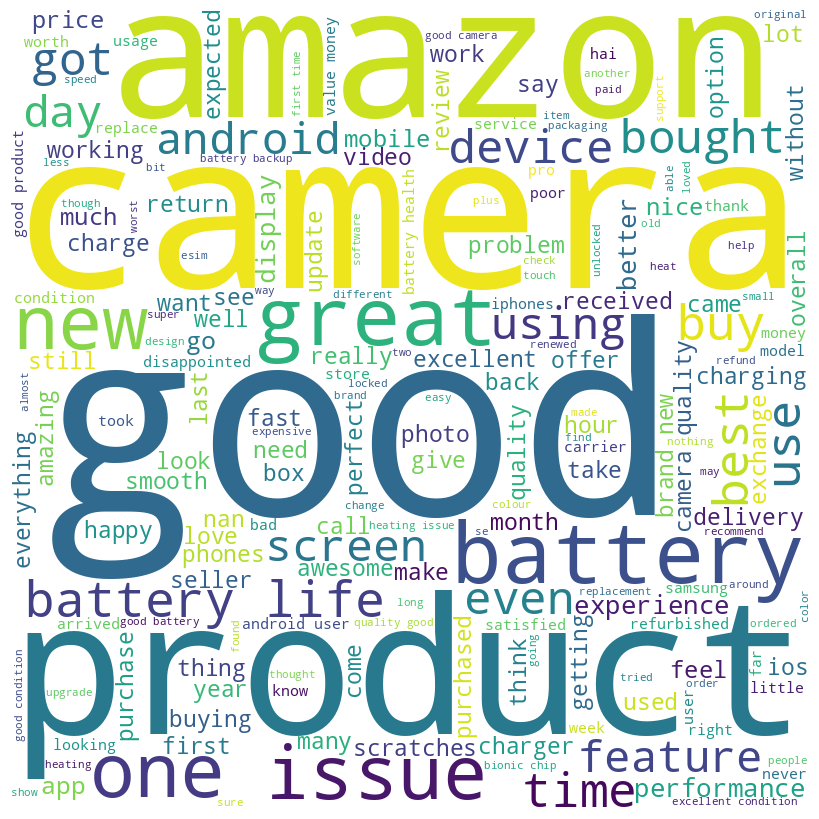

In [ ]:
texto_join =  " ".join(datos_iphone["reviewDescription_limpio"])
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(texto_join)
 # mostrar nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Usar el mismo conjunto de textos
count_vectorizer = CountVectorizer(min_df=(10))
X_count = count_vectorizer.fit_transform(datos_iphone["reviewDescription_limpio"])
datos_iphone["tokens"]=datos_iphone["reviewDescription_limpio"].apply(lambda x: x.split())
datos_iphone["tokens"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tokens
0,"[every, thing, good, iphones, nothing, compare..."
1,"[look, fabulous, android, user, switched, perf..."
2,"[tried, flip, camera, recording, facility, add..."
3,[genuine]
4,"[happy, get, amazon, offer]"
...,...
3057,"[useless, phon, never, buy, heat, n, useless, ..."
3058,"[iam, happy, product, charger, provided, extra..."
3059,[good]
3060,"[charging, mobile, getting, hot, even, using, ..."


In [ ]:
# Crear un diccionario y un corpus
dictionary = corpora.Dictionary([count_vectorizer.get_feature_names_out() ])
corpus = [dictionary.doc2bow(text.split()) for text in datos_iphone["reviewDescription_limpio"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values = [] # parametro determinar tópicos
model_list = {} # modelos de tópicos
topicos_num= range(2,10)
for num_topics in topicos_num:
    model = gensim.models.LdaModel(corpus=corpus,
                                    id2word=dictionary,
                                    num_topics=num_topics,
                                    random_state=100,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha='auto',
                                    per_word_topics=True)
    model_list[num_topics] = model
    coherencemodel = CoherenceModel(model=model, texts=datos_iphone["tokens"], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


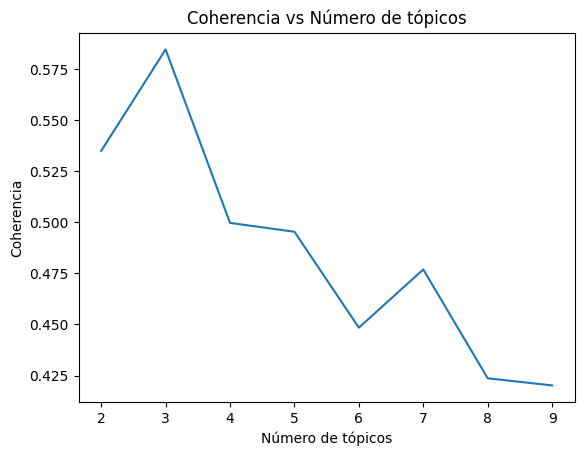

In [ ]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Número de tópicos")
plt.ylabel("Coherencia")
plt.title("Coherencia vs Número de tópicos")
plt.show()

El numero correcto de topicos que se debe escoger son 3 esto debido a que el numero correcto de topicos se debe escoger teniendo en cuenta donde se encuentra el pico mas alto al cual 3 es donde se encuentra el pico siendo 3 el numero correcto.

In [ ]:
# Visualización interactiva
vis = pyLDAvis.gensim_models.prepare(model_list[3], corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = model_list[3].print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.034*"good" + 0.029*"battery" + 0.023*"camera" + 0.015*"android" + 0.014*"quality" + 0.013*"one" + 0.013*"like" + 0.011*"buy" + 0.011*"great" + 0.010*"best"')
(1, '0.058*"product" + 0.046*"amazon" + 0.024*"working" + 0.024*"new" + 0.019*"service" + 0.019*"got" + 0.018*"nice" + 0.017*"bought" + 0.016*"delivery" + 0.013*"amazing"')
(2, '0.020*"display" + 0.017*"performance" + 0.015*"photos" + 0.014*"videos" + 0.014*"camera" + 0.013*"feels" + 0.013*"mode" + 0.012*"design" + 0.012*"experience" + 0.011*"light"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ETIQUETA DE LOS CLUSTER

In [ ]:
document_topics = model_list[3].get_document_topics(corpus)
dominant_topics = []
for doc_topics in document_topics:
    # Ordenar los tópicos por probabilidad y tomar el de mayor valor
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]  # x[1] es la probabilidad, x[0] es el ID del tópico
    dominant_topics.append(dominant_topic)
datos_iphone["dominant_topic"] = dominant_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_iphone["dominant_topic"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
dominant_topic,
0,2214
1,727
2,121


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


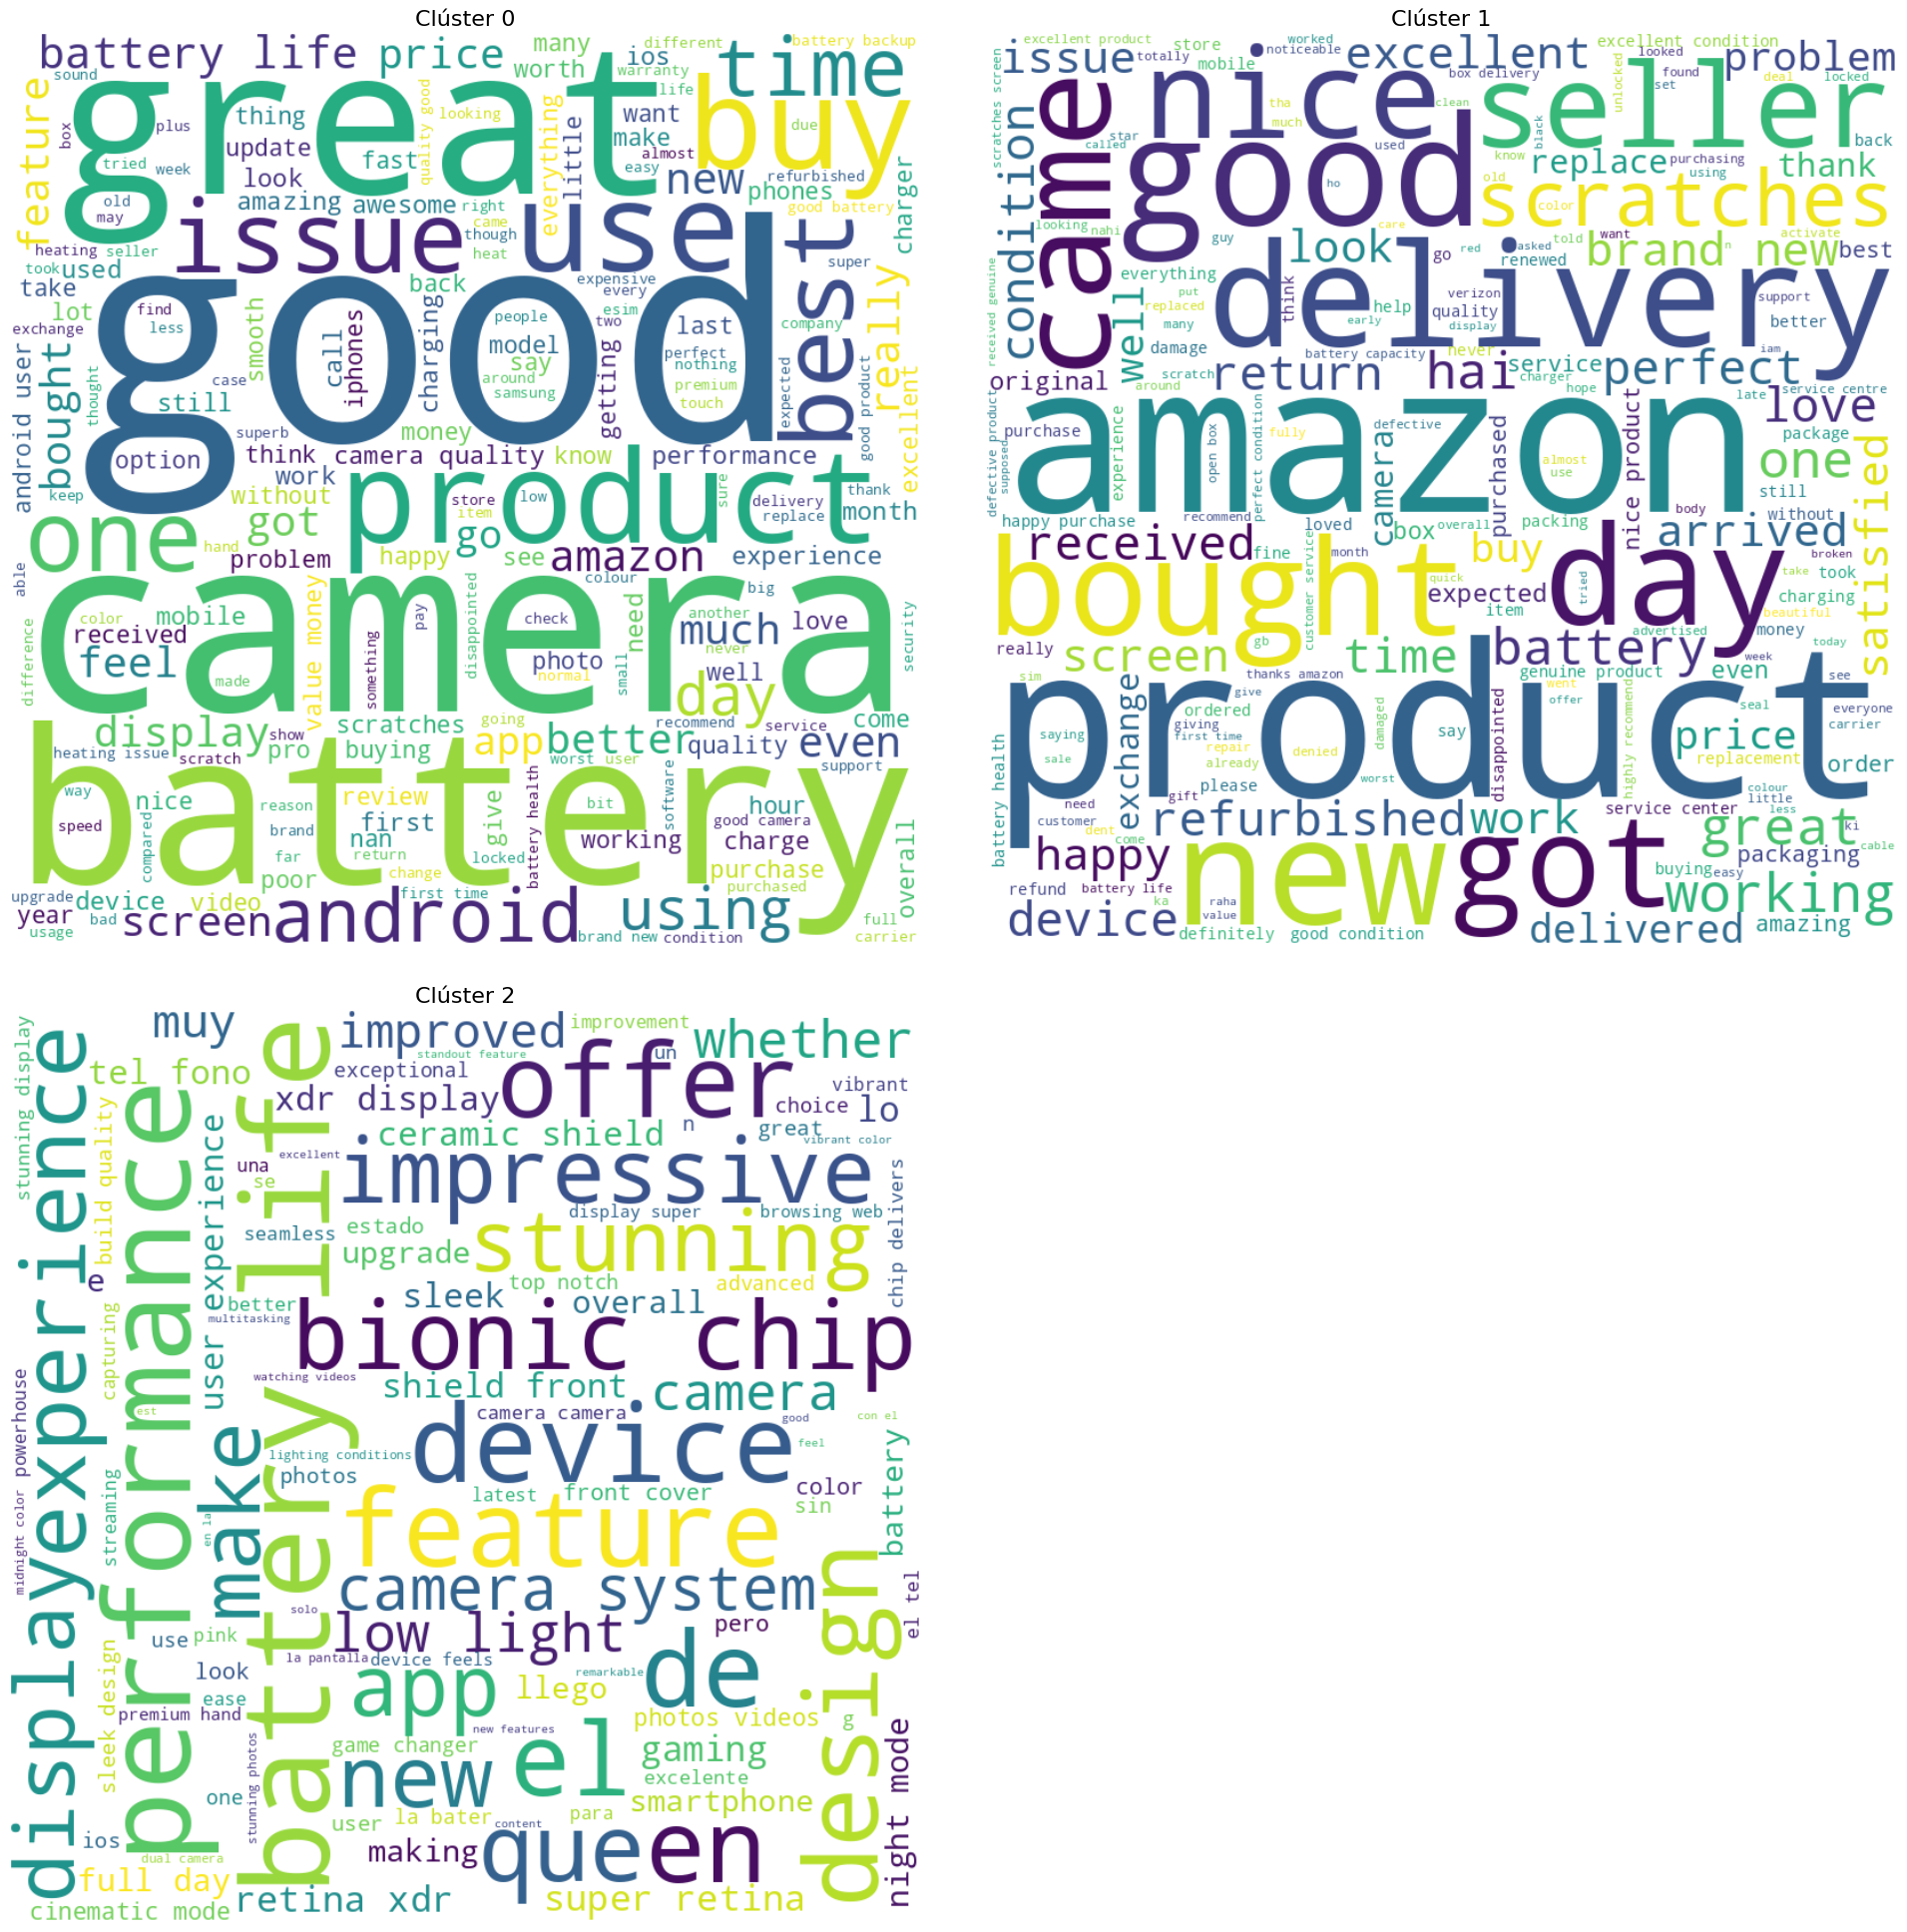

In [ ]:
import math
# Obtener los valores únicos de labels_kmeans
labels_unicos = datos_iphone["dominant_topic"].unique()

# Definir el número de filas y columnas
num_columnas = 2
num_filas =  math.ceil(len(labels_unicos) / num_columnas)  # Calcular el número de columnas necesarias


# Crear la figura y los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 20))  # Ajustar el tamaño total del gráfico
axes = axes.flatten()  # Aplanar el array de ejes para un fácil acceso

# Generar una nube de palabras por cada valor único en labels_kmeans
for i, label in enumerate(labels_unicos):
    # Unir los textos que corresponden al label actual
    filtro_cluster=datos_iphone["dominant_topic"] == label
    texto_join = " ".join(datos_iphone.loc[filtro_cluster, "reviewDescription_limpio"])

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(texto_join)

    # Mostrar la nube de palabras en el subplot correspondiente
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Clúster {label}", fontsize=16)

# Eliminar cualquier subplot vacío (si los hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout(pad=3)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


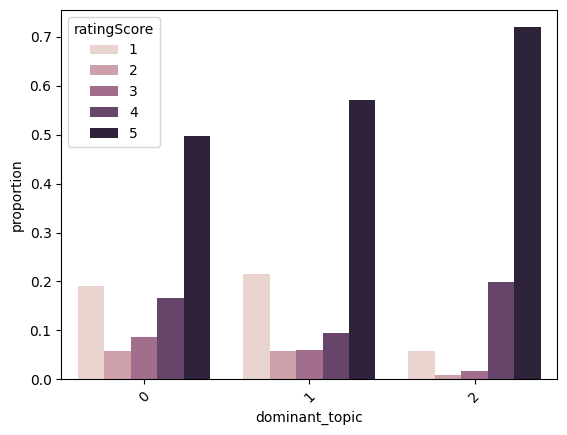

In [ ]:
tabla_frecuencia_relacion = datos_iphone.groupby('dominant_topic')['ratingScore'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='dominant_topic', y='proportion', hue='ratingScore')
plt.xticks(rotation=45)
plt.show()

Como se puede observar en la grafica de los tres topicos que se sacaron el que menor promedio de rating de 5 estrellas tuvo fue el topico 0. El cual dentro de este topico principalmente se pueden observar palabras como Camera, Battery, Issue lo que se puede concluir que algunos comentarios que se encuentran dentro de ese topico tuvieron problemas con sus celulares apple pudiendo tener problemas o con la camara que se ve que se observa mucho o con la bateria del celular.